In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from librosa import hz_to_note

In [22]:
sample_rate, audio_data = wav.read("chords/CMajorScale.wav")

In [23]:
# if we have stereo input
if len(audio_data.shape) == 2:
    # pick out only one channel
    audio_data = audio_data[:, 0]

audio_data

array([ 0,  1,  3, ..., -3, -3, -4], dtype=int16)

In [24]:
# Perform Fourier Transform
# Note: Contains complex numbers representing the frequency components
fft_result = fft(audio_data)

# Calculate Frequencies
fft_freq = fftfreq(len(audio_data), d=1/sample_rate)

In [25]:
for i in range(10):
    print(f"Frequency {fft_freq[i]} Hz, Magnitude: {abs(fft_result[i])}")

Frequency 0.0 Hz, Magnitude: 355.0000000001328
Frequency 0.18563028004495535 Hz, Magnitude: 409.6204216858195
Frequency 0.3712605600899107 Hz, Magnitude: 548.0073402866188
Frequency 0.556890840134866 Hz, Magnitude: 547.0979444130963
Frequency 0.7425211201798214 Hz, Magnitude: 375.125228505723
Frequency 0.9281514002247768 Hz, Magnitude: 1456.2999288503202
Frequency 1.113781680269732 Hz, Magnitude: 457.9603287904567
Frequency 1.2994119603146874 Hz, Magnitude: 893.8635994721311
Frequency 1.4850422403596428 Hz, Magnitude: 758.1739844101107
Frequency 1.6706725204045982 Hz, Magnitude: 913.1699093536681


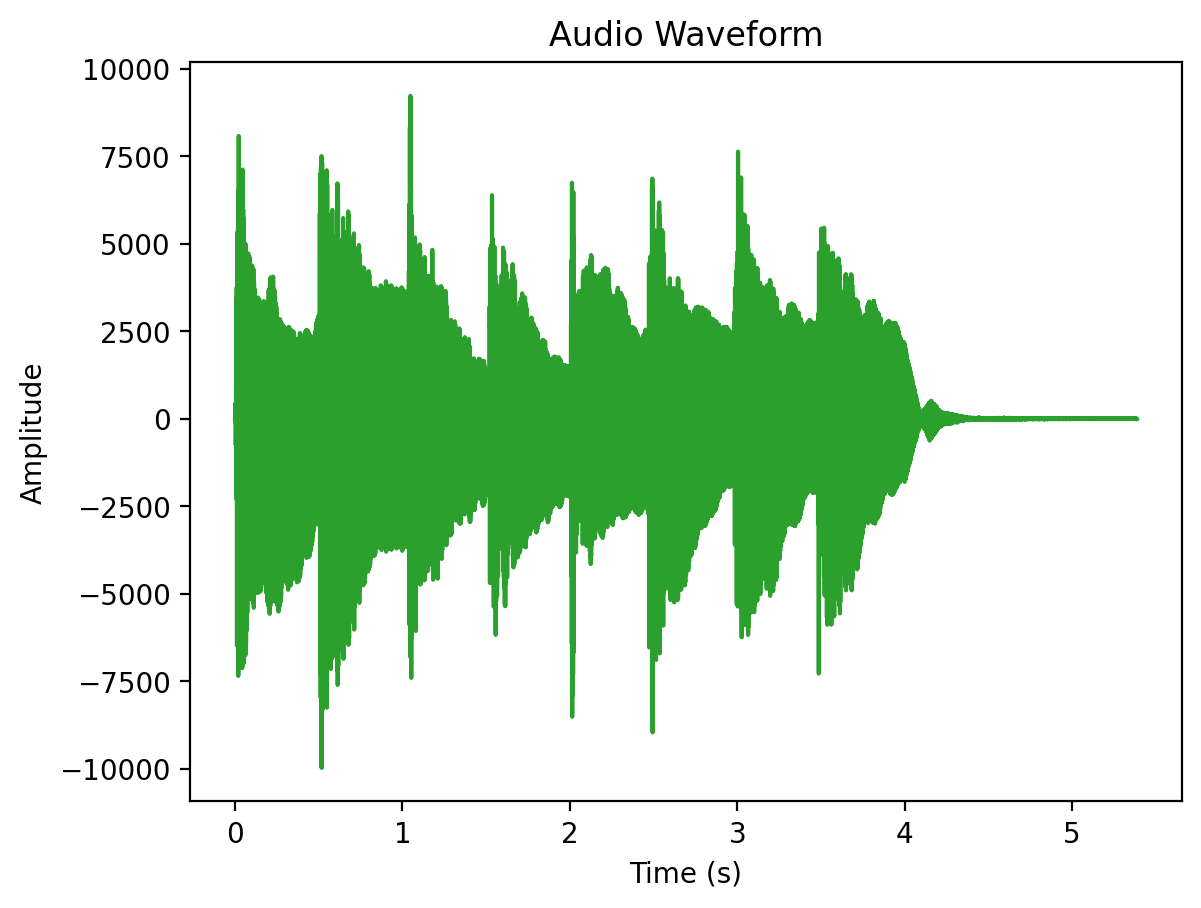

In [71]:
# Time domain Plot
time = np.arange(len(audio_data)) / sample_rate  # Create time axis
plt.plot(time, audio_data, color='tab:green')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

In [27]:
# Isolating positive frequencies
# Note: only first half of values are unique/positive
n = len(fft_freq) - 1
abs_fft_result = abs(fft_result)**2
pos_fft_freq = fft_freq[:n // 2]
pos_fft_result = abs_fft_result[:n // 2]

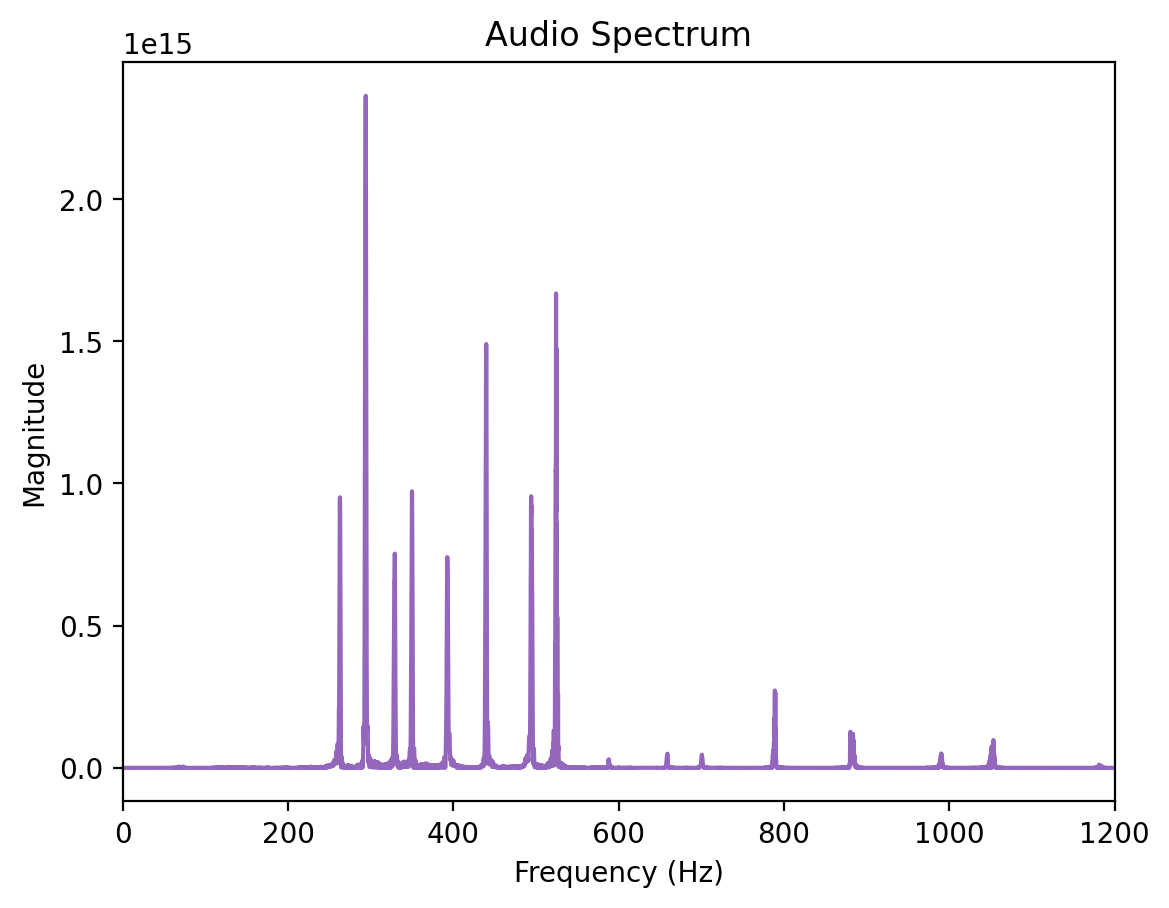

In [72]:
# Frequency Domain Plot

plt.plot(pos_fft_freq, pos_fft_result, color='tab:purple')  # Plot absolute values of frequency components
plt.xlim(0, 1200)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Audio Spectrum")
plt.show()

In [29]:
# Extracting notes from the frequency domain plot
max_freq = np.argmax(pos_fft_result)
print(pos_fft_freq[max_freq])

294.0383635912093


In [30]:
# Note: Distance between note frequencies becomes smaller in the lower ranges
# https://mixbutton.com/mixing-articles/music-note-to-frequency-chart/
peaks, _ = find_peaks(pos_fft_result, prominence=5e13, distance=30)

In [31]:
pos_fft_freq[peaks].shape

(12,)

In [32]:
note_frequencies = pos_fft_freq[peaks]
note_frequencies

array([ 262.85247654,  294.03836359,  329.12248652,  349.91307788,
        392.6080423 ,  439.75813343,  494.14780548,  524.21991085,
        788.92869019,  880.44441825,  990.15191376, 1053.26620898])

In [33]:
notes = hz_to_note(note_frequencies)

In [34]:
print(notes)

['C4' 'D4' 'E4' 'F4' 'G4' 'A4' 'B4' 'C5' 'G5' 'A5' 'B5' 'C6']


Determine the Key of the song

In [68]:
from librosa.feature import chroma_stft
from pprint import pprint
import librosa
from IPython.display import display, Audio

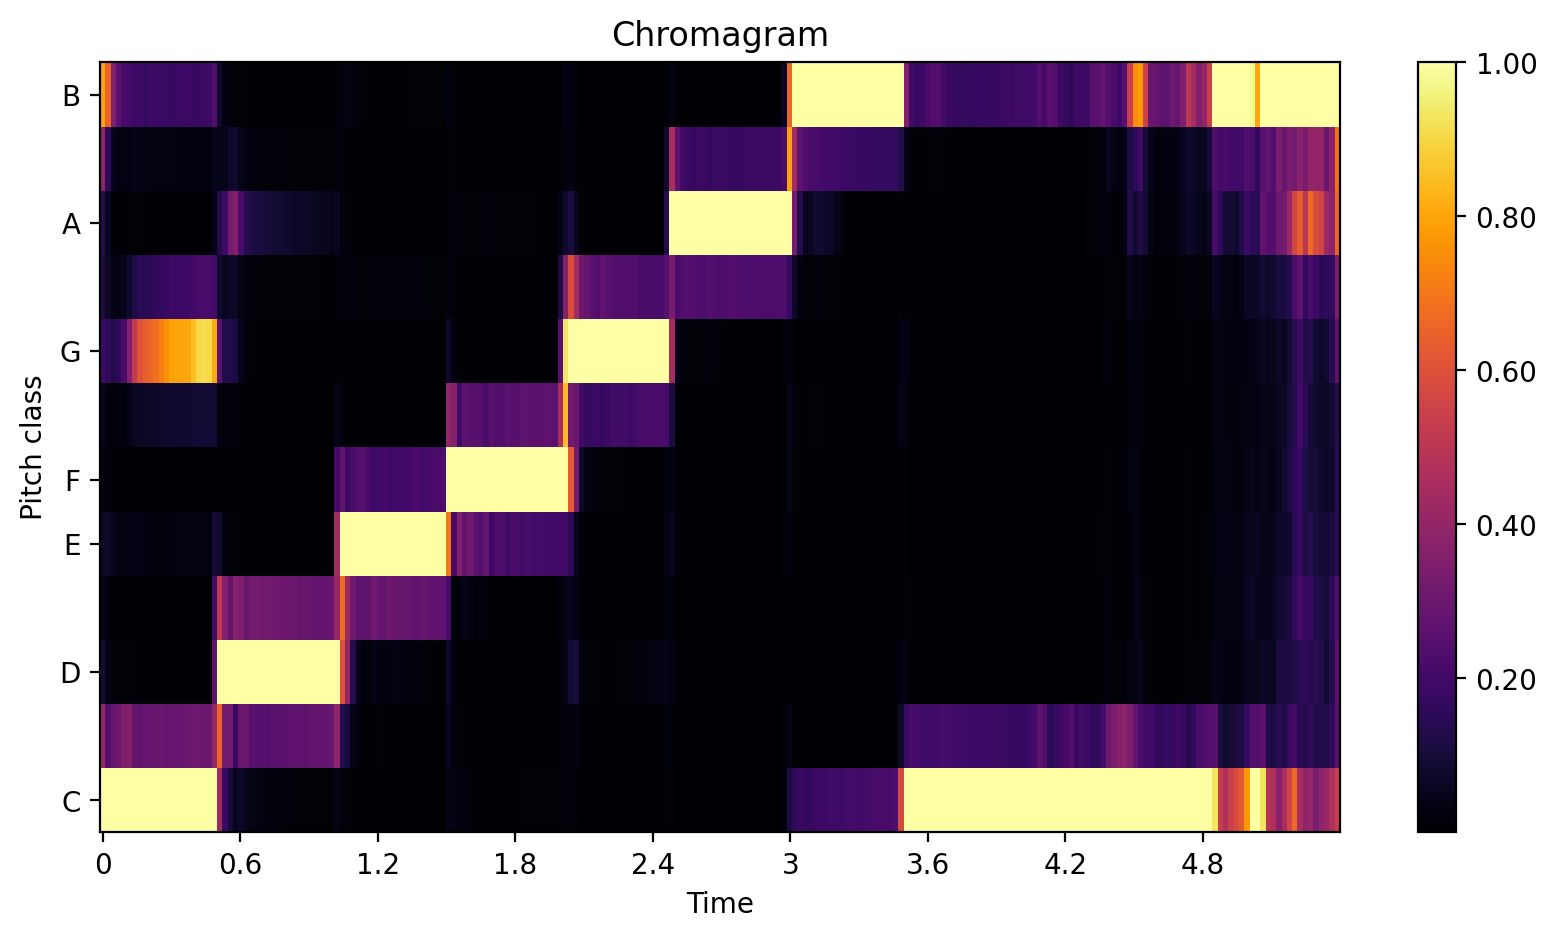

In [73]:
y, sr = librosa.load("chords/CMajorScale.wav")
chromagram = chroma_stft(y=y, sr=sr)

# Show Audio
display(Audio("chords/CMajorScale.wav"))

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", cmap="inferno")
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [37]:
audio, sr = librosa.load('chords/CMajMelody1.wav')

In [38]:
chromagram = chroma_stft(y=audio, sr=sr)
chromagram.shape

(12, 467)

In [39]:
chromagram[:, 0]

array([0.6075588 , 0.5626021 , 1.        , 0.8682591 , 0.79861206,
       0.9680913 , 0.83080316, 0.6625716 , 0.6620939 , 0.7245151 ,
       0.8281632 , 0.6312038 ], dtype=float32)

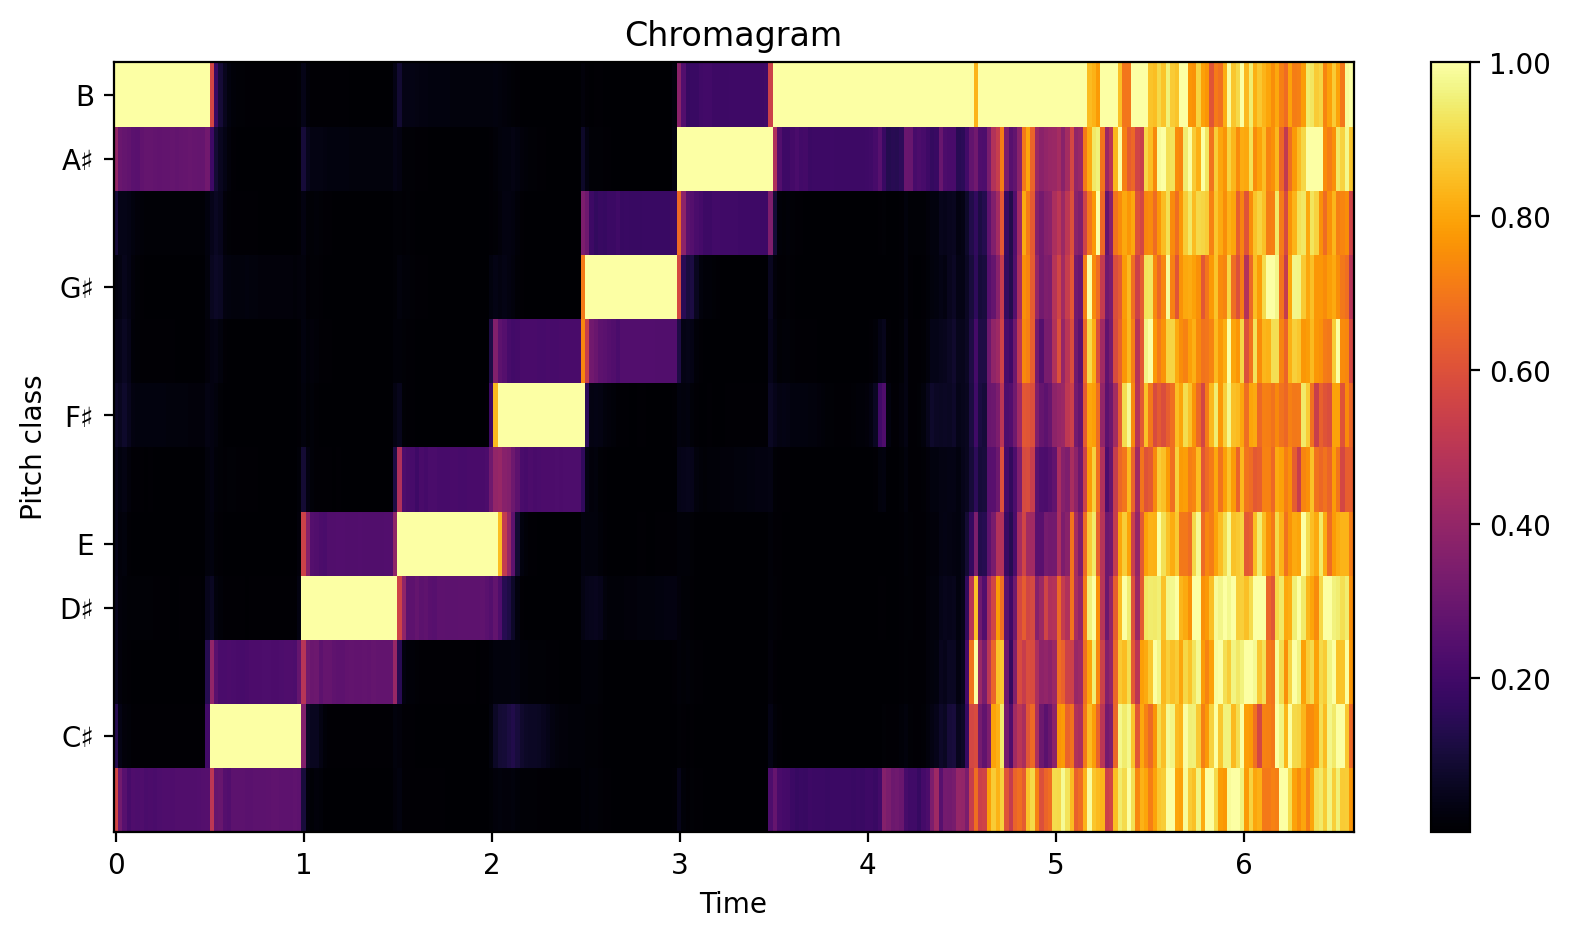

In [74]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/BMajor.wav")
b_chromagram = librosa.feature.chroma_stft(y=y, sr=sr) 
b_duration = librosa.core.audio.get_duration(y=y, sr=sr)

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(b_chromagram, x_axis="time", y_axis="chroma", 
                         cmap="inferno", key='B:maj')
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [41]:
print(b_duration)
b_chromagram.shape

6.5712471655328795


(12, 284)

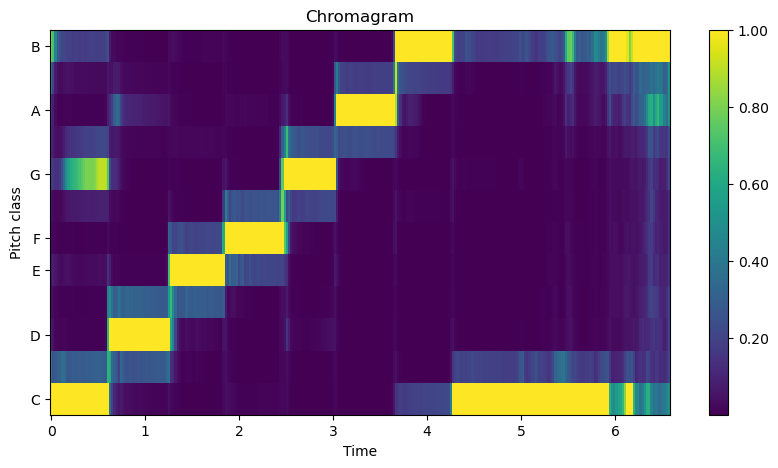

In [42]:
# Load audio and extract chromagram
y, sr = librosa.load("chords/CMajorScale.wav")
c_duration = librosa.core.audio.get_duration(y=y, sr=sr)

hop_length = int(512 * (c_duration/b_duration))
c_chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length) 

# Visualize the chromagram (optional)
plt.figure(figsize=(10, 5))
librosa.display.specshow(c_chromagram, x_axis="time", y_axis="chroma", cmap="viridis")
plt.title("Chromagram")
plt.colorbar(format="%.2f")
plt.show()

In [43]:
c_chromagram.shape

(12, 284)

In [44]:
from music21 import scale
import json

In [45]:
# Testing Key Estimation
centers = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

major = dict(list())
minor = dict(list())
for center in centers:
    # could add more scales later (ex. lydian, mixolydian, etc.)
    maj_scale = [str(note)[:-1] for note in scale.MajorScale(center).getPitches()]
    min_scale = [str(note)[:-1] for note in scale.MinorScale(center).getPitches()]

    major_profile = [0] * 12
    minor_profile = [0] * 12

    for i, note in enumerate(centers):
        if note in maj_scale:
            major_profile[i] = 1

    for i, note in enumerate(centers):
        if note in min_scale:
            minor_profile[i] = 1

    major[center] = major_profile
    minor[center] = minor_profile

In [46]:
# Collection of key profiles for each minor key
minor

{'C': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 'C#': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
 'D': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'D#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 'E': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'F': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 'F#': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 'G': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 'G#': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
 'A': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 'A#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 'B': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]}

In [47]:
major

{'C': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 'C#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 'D': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'D#': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 'E': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
 'F': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'F#': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 'G': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'G#': [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 'A': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 'A#': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 'B': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]}

In [48]:
with open("key_profiles/major.json", "w") as f:
    json.dump(major, f)

In [49]:
with open("key_profiles/minor.json", "w") as f:
    json.dump(minor, f)

In [50]:
def similarities(note, mode='major'):
    maj_scale = [str(note)[:-1] for note in scale.MajorScale(center).getPitches()]
    min_scale = [str(note)[:-1] for note in scale.MinorScale(center).getPitches()]


In [51]:
chroma_matrix = np.matrix(chromagram).T

major_similarities = {}
for key in major:
    profile = np.matrix(major[key]).T
    score = np.mean(chroma_matrix * profile)
    major_similarities[key] = score

minor_similarities = {}
for key in minor:
    profile = np.matrix(minor[key]).T
    score = np.mean(chroma_matrix * profile) 
    minor_similarities[key] = score

In [52]:
major_similarities

{'C': 2.514686656747875,
 'C#': 0.9091653246322858,
 'D': 2.144850865783214,
 'D#': 0.5302927322861214,
 'E': 2.0648855451211268,
 'F': 1.8335700114167892,
 'F#': 1.5902819699633715,
 'G': 2.5082486782849185,
 'G#': 0.8423954958187883,
 'A': 2.102087433331265,
 'A#': 0.37938007327470713,
 'B': 1.8700580639202284}

In [53]:
minor_similarities

{'C': 1.0750942101694116,
 'C#': 2.0648855451211268,
 'D': 1.8335700114167892,
 'D#': 1.5902819699633715,
 'E': 2.5082486782849185,
 'F': 0.9423844747741884,
 'F#': 2.102087433331265,
 'G': 1.5537939174599322,
 'G#': 1.8700580639202284,
 'A': 2.514686656747875,
 'A#': 0.9091653246322858,
 'B': 2.144850865783214}

In [54]:
major_similarities.items()

dict_items([('C', 2.514686656747875), ('C#', 0.9091653246322858), ('D', 2.144850865783214), ('D#', 0.5302927322861214), ('E', 2.0648855451211268), ('F', 1.8335700114167892), ('F#', 1.5902819699633715), ('G', 2.5082486782849185), ('G#', 0.8423954958187883), ('A', 2.102087433331265), ('A#', 0.37938007327470713), ('B', 1.8700580639202284)])

In [55]:
minor_similarities.items()

dict_items([('C', 1.0750942101694116), ('C#', 2.0648855451211268), ('D', 1.8335700114167892), ('D#', 1.5902819699633715), ('E', 2.5082486782849185), ('F', 0.9423844747741884), ('F#', 2.102087433331265), ('G', 1.5537939174599322), ('G#', 1.8700580639202284), ('A', 2.514686656747875), ('A#', 0.9091653246322858), ('B', 2.144850865783214)])

In [56]:
sorted_major_similarties = sorted(major_similarities.items(), key=lambda x: x[1])
sorted_major_array = np.array(sorted_major_similarties)
pprint(sorted_major_array[:, 1])

array(['0.37938007327470713', '0.5302927322861214', '0.8423954958187883',
       '0.9091653246322858', '1.5902819699633715', '1.8335700114167892',
       '1.8700580639202284', '2.0648855451211268', '2.102087433331265',
       '2.144850865783214', '2.5082486782849185', '2.514686656747875'],
      dtype='<U32')


In [57]:
sorted_minor_similarties = sorted(minor_similarities.items(), key=lambda x: x[1])
sorted_minor_array = np.array(sorted_minor_similarties)
pprint(sorted_minor_array[:, 1])

array(['0.9091653246322858', '0.9423844747741884', '1.0750942101694116',
       '1.5537939174599322', '1.5902819699633715', '1.8335700114167892',
       '1.8700580639202284', '2.0648855451211268', '2.102087433331265',
       '2.144850865783214', '2.5082486782849185', '2.514686656747875'],
      dtype='<U32')


Text(0, 0.5, 'Score')

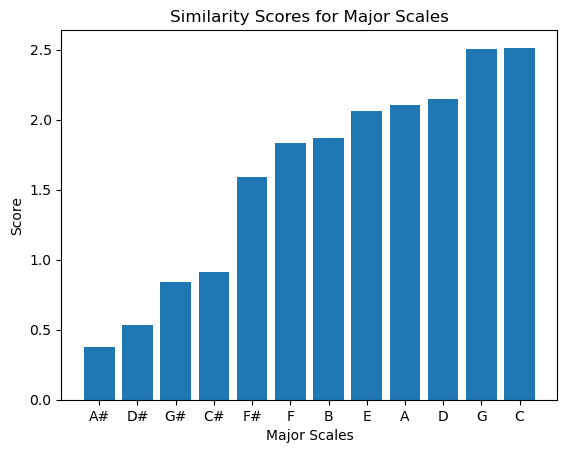

In [58]:
notes = sorted_major_array[:, 0]
scores = sorted_major_array[:, 1].astype(float)

plt.bar(notes, scores)
plt.title("Similarity Scores for Major Scales")
plt.xlabel("Major Scales")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

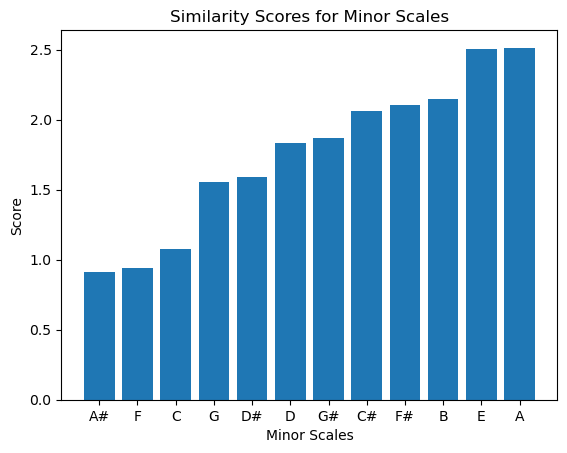

In [59]:
notes = sorted_minor_array[:, 0]
scores = sorted_minor_array[:, 1].astype(float)

plt.bar(notes, scores)
plt.title("Similarity Scores for Minor Scales")
plt.xlabel("Minor Scales")
plt.ylabel("Score")

Note: A minor and C major are the same key

In [60]:
# Create a scale object for C major
c_major_scale = scale.MinorScale('C')

# Access the notes in the scale
notes = c_major_scale.getPitches()

# Print the notes
for note in notes:
  print(str(note)[:-1])

C
D
E-
F
G
A-
B-
C


Next Goal: Split the Audio signal into many small "time" chunks to find the ordering of the notes in the song
and consider making an adaptive method that finds the period of the signal and decomposes over adaptive ranges

Next Goal: Split the Audio signal into many small "time" chunks to find the ordering of the notes in the song
and consider making an adaptive method that finds the period of the signal and decomposes over adaptive ranges